In [ ]:
# Importing data & Checking for NULL Values

import pandas as pd
import numpy as np
dF=pd.read_csv('/content/CO2 Emissions_Canada.csv')
missing_vals=dF.isnull().sum()
print(missing_vals)
print(pd.size())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [ ]:
#Searching for duplicate data
duplicate = dF.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1103 duplicated rows in the data


In [ ]:
#dropping of duplicate data
dF.drop_duplicates(inplace=True)

In [ ]:
#data understanding
dF.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [ ]:
#finding correlation
print(dF.dtypes)
print()

# Check for non-numeric values in 'CO2 Emissions(g/km)' (binary values)
non_numeric_co2 = dF[~dF['CO2 Emissions(g/km)'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_co2)
print()

# Check for non-numeric values in all columns
non_numeric_values = dF.applymap(lambda x: isinstance(x, str))
print(non_numeric_values.any())
print()

# Exclude non-numeric columns
numeric_columns = dF.select_dtypes(include=['float64', 'int64'])

# Calculate correlation of numeric columns w.r.t CO2
correlation = numeric_columns.corr()['CO2 Emissions(g/km)'].sort_values()
print(correlation)


Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

Empty DataFrame
Columns: [Make, Model, Vehicle Class, Engine Size(L), Cylinders, Transmission, Fuel Type, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg), CO2 Emissions(g/km)]
Index: []

Make                                 True
Model                                True
Vehicle Class                        True
Engine Size(L)                      False
Cylinders            

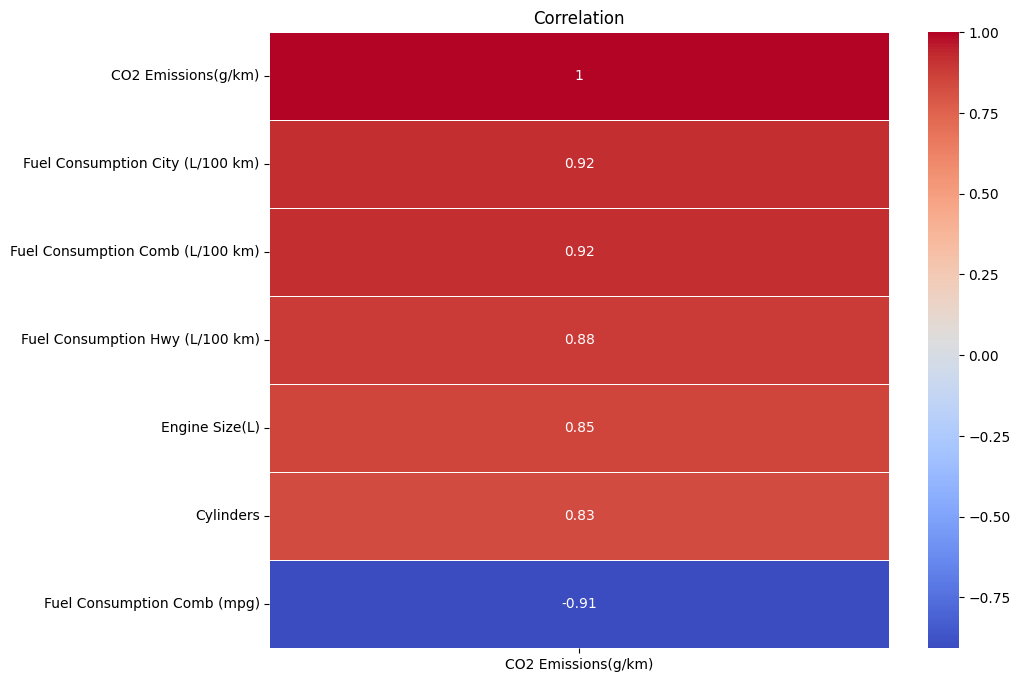

In [ ]:
#Plot heatmap of the calulated correlated values

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation
correlation = numeric_columns.corr()['CO2 Emissions(g/km)'].sort_values(ascending=False)

# Convert correlation Series to DataFrame with one column
correlation_df = correlation.to_frame()

plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(correlation_df, cmap='coolwarm', linewidth=0.5, annot=True)

plt.title('Correlation')
plt.show()

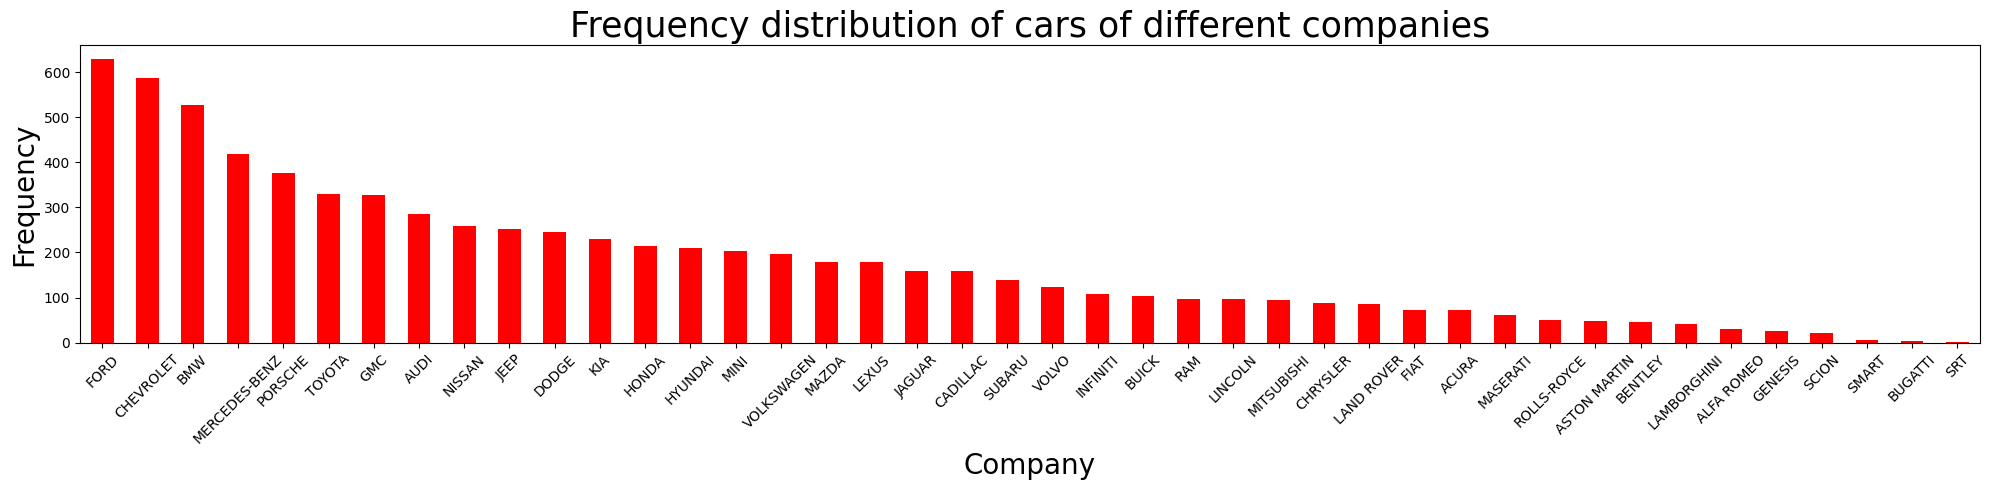

In [ ]:
# DATA VISUALIZATION
# Frequency distribution of cars of diff. companies

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

dF.groupby('Make')['Make'].count().sort_values(ascending=False).plot(kind='bar',color='red')

plt.title('Frequency distribution of cars of different companies', fontsize=25)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

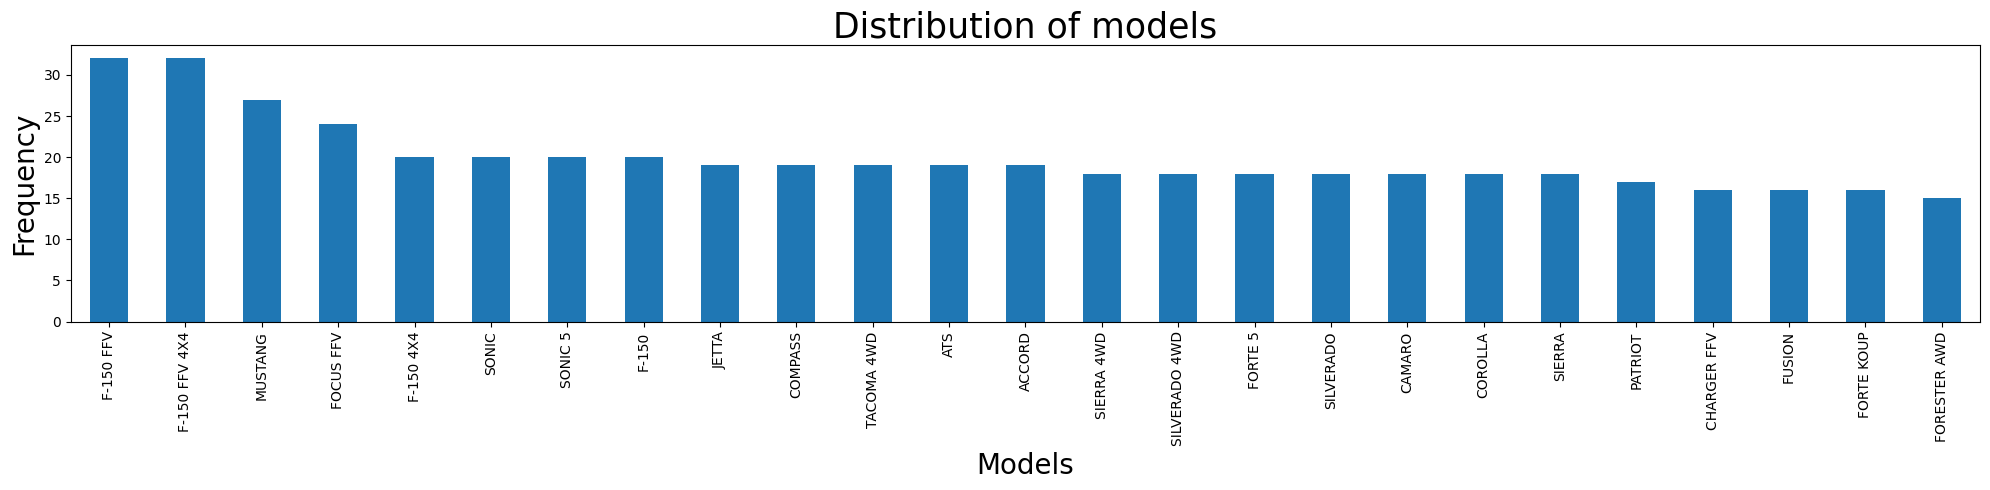

In [ ]:
# Frequency distribution of models

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

dF.groupby('Model')['Model'].count().sort_values(ascending=False)[:25].plot(kind='bar')

plt.title('Distribution of models', fontsize=25)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

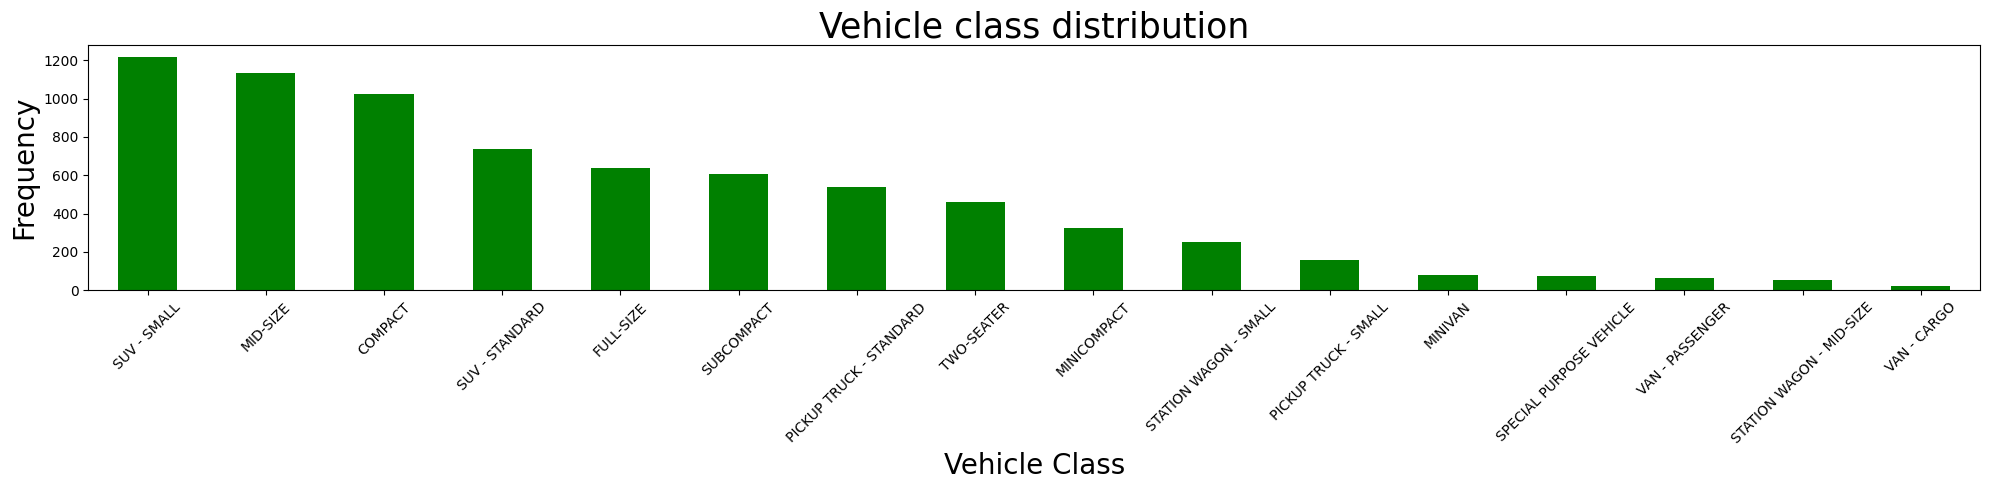

In [ ]:
# Frequency distribution of vehicle class

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

dF.groupby('Vehicle Class')['Vehicle Class'].count().sort_values(ascending=False).plot(kind='bar', color='green')

plt.title('Vehicle class distribution', fontsize=25)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

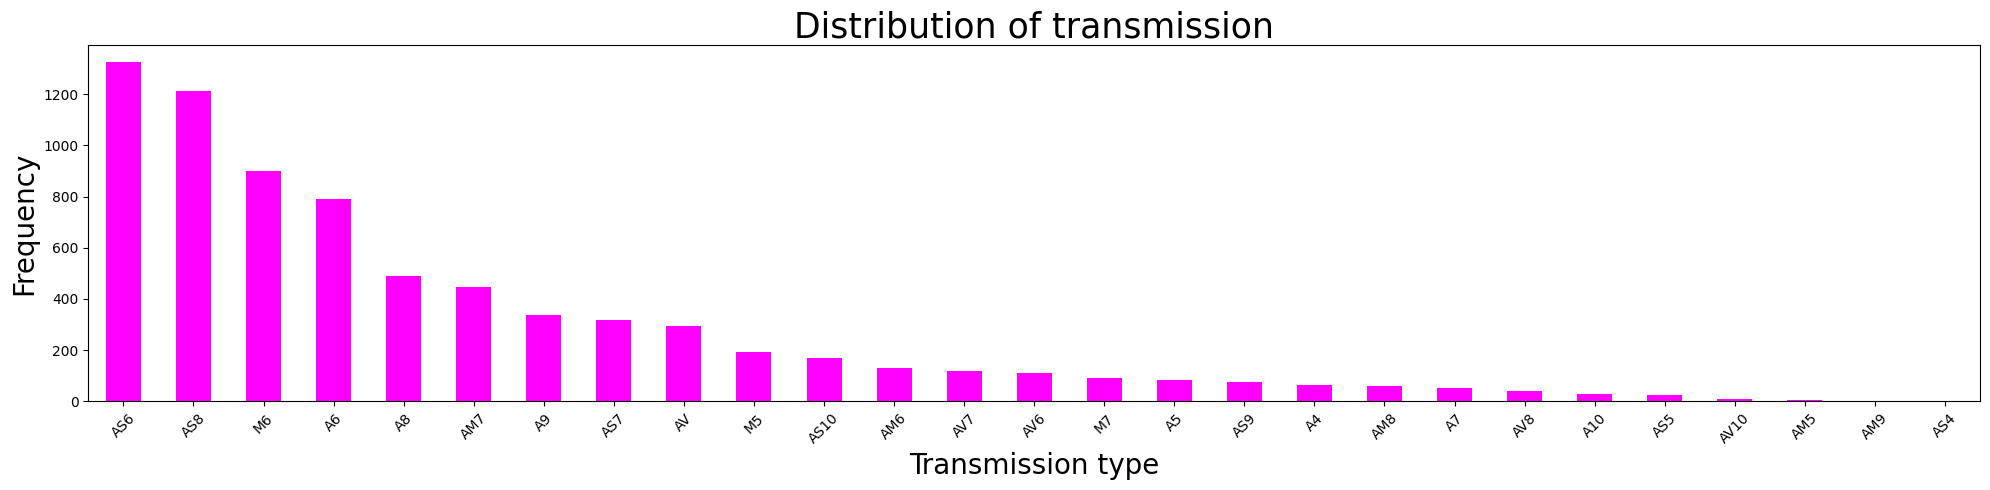

In [ ]:
# Frequency distribution of transmission

import matplotlib.pyplot as plt
import pandas as pd

dF = pd.read_csv('/content/CO2 Emissions_Canada.csv')

plt.figure(figsize=(20,5))

dF.groupby('Transmission')['Transmission'].count().sort_values(ascending=False).plot(kind='bar', color='magenta')

plt.title('Distribution of transmission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#checking for distinct model names

dF['Model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [ ]:
#checking for distinct company names

dF['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [ ]:
import numpy as np

# Putting different transmission sub-catagories into their respective catagories

dF['Transmission']=np.where(dF['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',dF['Transmission'])
dF['Transmission']=np.where(dF['Transmission'].isin(['AV','AV7','AV8','AV6','AV10']),'Autonomous',dF['Transmission'])
dF['Transmission']=np.where(dF['Transmission'].isin(['AS4','AS5','AS6','AS8','AS7','AS9','AS10']),'Automatic Selection',dF['Transmission'])
dF['Transmission']=np.where(dF['Transmission'].isin(['M6','M5','M7']),'Manual',dF['Transmission'])
dF['Transmission']=np.where(dF['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9','AM10']),'Automated Manual',dF['Transmission'])
print(dF['Transmission'].unique())
print()
print(dF['Transmission'].value_counts())


['Automatic Selection' 'Manual' 'Autonomous' 'Automated Manual'
 'Automatic']

Transmission
Automatic Selection    3127
Automatic              1851
Manual                 1185
Automated Manual        646
Autonomous              576
Name: count, dtype: int64


In [ ]:
# Renaming fuel types for better understanding

dF['Fuel Type']= np.where(dF['Fuel Type']=='X','Regular gasoline',dF['Fuel Type'])
dF['Fuel Type']= np.where(dF['Fuel Type']=='Z','Premium gasoline',dF['Fuel Type'])
dF['Fuel Type']= np.where(dF['Fuel Type']=='E','Ethanol',dF['Fuel Type'])
dF['Fuel Type']= np.where(dF['Fuel Type']=='D','Diesel',dF['Fuel Type'])
dF['Fuel Type']= np.where(dF['Fuel Type']=='N','Natural gas',dF['Fuel Type'])

print(dF['Fuel Type'].unique())
print(dF['Vehicle Class'].unique())


['Premium gasoline' 'Diesel' 'Regular gasoline' 'Ethanol' 'Natural gas']
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [ ]:
#Counting no. of values of diff. fule types

dF['Fuel Type'].value_counts()


Fuel Type
Regular gasoline    3039
Premium gasoline    2765
Ethanol              330
Diesel               147
Natural gas            1
Name: count, dtype: int64

In [ ]:
# Checking for rows where the fule type is natural gas & store the row index in ind

dF_N = dF[dF['Fuel Type']== 'Natural gas']

ind = dF_N.index

print(dF_N)

           Make             Model Vehicle Class  Engine Size(L)  Cylinders  \
2439  CHEVROLET  IMPALA DUAL FUEL      MID-SIZE             3.6          6   

     Transmission    Fuel Type  Fuel Consumption City (L/100 km)  \
2439          AS6  Natural gas                              15.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
2439                              9.5                              12.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
2439                           22                  213  


In [ ]:
# Dropping the rows where the fule type is natural gas

for i in ind:
    dF.drop(i, axis=0, inplace=True)

In [ ]:
import pandas as pd



d_v =pd.get_dummies(dF['Fuel Type'], prefix='Fuel', drop_first=True)
dv = pd.get_dummies(dF["Transmission"], drop_first=True)
d_v.head()

,Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [ ]:
#Concatinating all 3 dataframes

df = [dF, d_v,dv]

data = pd.concat(df, axis=1)
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),...,AS8,AS9,AV,AV10,AV6,AV7,AV8,M5,M6,M7
0,ACURA,ILX,COMPACT,2.0,4,AS5,Premium gasoline,9.9,6.7,8.5,...,False,False,False,False,False,False,False,False,False,False
1,ACURA,ILX,COMPACT,2.4,4,M6,Premium gasoline,11.2,7.7,9.6,...,False,False,False,False,False,False,False,False,True,False
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Premium gasoline,6.0,5.8,5.9,...,False,False,False,False,False,True,False,False,False,False
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.7,9.1,11.1,...,False,False,False,False,False,False,False,False,False,False
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.1,8.7,10.6,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Dropping the transmission & fule type columns from data(cancatinated dF)

df = [dF, d_v,dv]
data = pd.concat(df, axis=1)
data.drop(['Fuel Type'], inplace=True, axis=1)
data.drop(['Transmission'], inplace=True, axis=1)


In [ ]:
#It replaces each value in the Make/Model/Vehicle_Class column with its corresponding frequency stored in dict
# converts the categorical values into numerical representations

df_freq = data['Make'].value_counts().to_dict()
mod_freq = data['Model'].value_counts().to_dict()
veh_freq = data['Vehicle Class'].value_counts().to_dict()
data['Make'] = data['Make'].map(df_freq)
data['Model'] = data['Model'].map(mod_freq)
data['Vehicle Class'] = data['Vehicle Class'].map(veh_freq)

In [ ]:
#Divide the dF into target & features for prediction purpose

X = data.drop('CO2 Emissions(g/km)', axis=1)  # X contains all cols. except CO2 (features)
y = data['CO2 Emissions(g/km)']    # Y conatains the CO2 col. (target)

In [ ]:
X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel_Ethanol,...,AS8,AS9,AV,AV10,AV6,AV7,AV8,M5,M6,M7
0,51,7,903,2.0,4,9.9,6.7,8.5,33,False,...,False,False,False,False,False,False,False,False,False,False
1,51,7,903,2.4,4,11.2,7.7,9.6,29,False,...,False,False,False,False,False,False,False,False,True,False
2,51,2,903,1.5,4,6.0,5.8,5.9,48,False,...,False,False,False,False,False,True,False,False,False,False
3,51,1,1006,3.5,6,12.7,9.1,11.1,25,False,...,False,False,False,False,False,False,False,False,False,False
4,51,4,1006,3.5,6,12.1,8.7,10.6,27,False,...,False,False,False,False,False,False,False,False,False,False


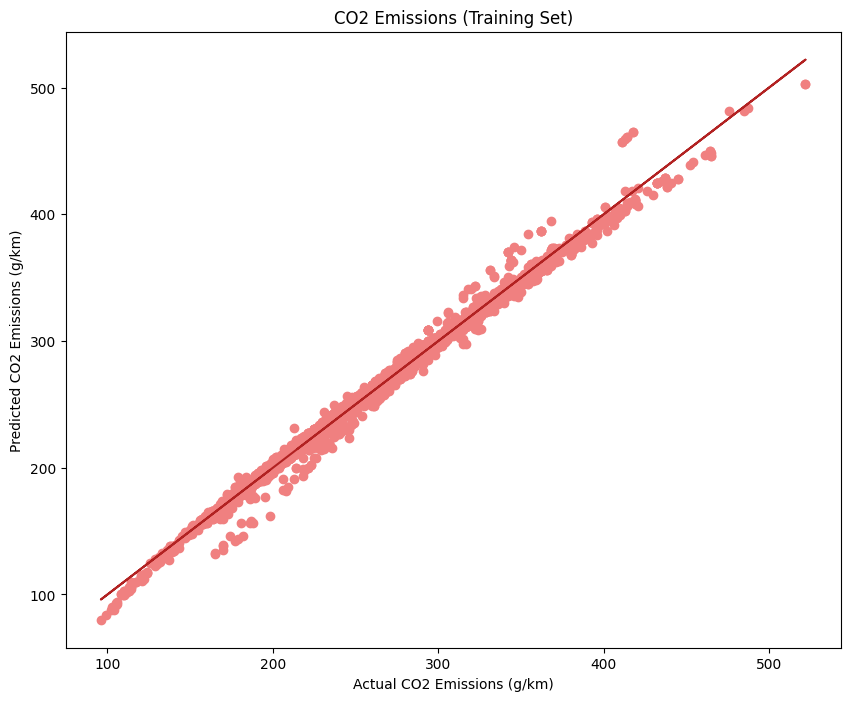

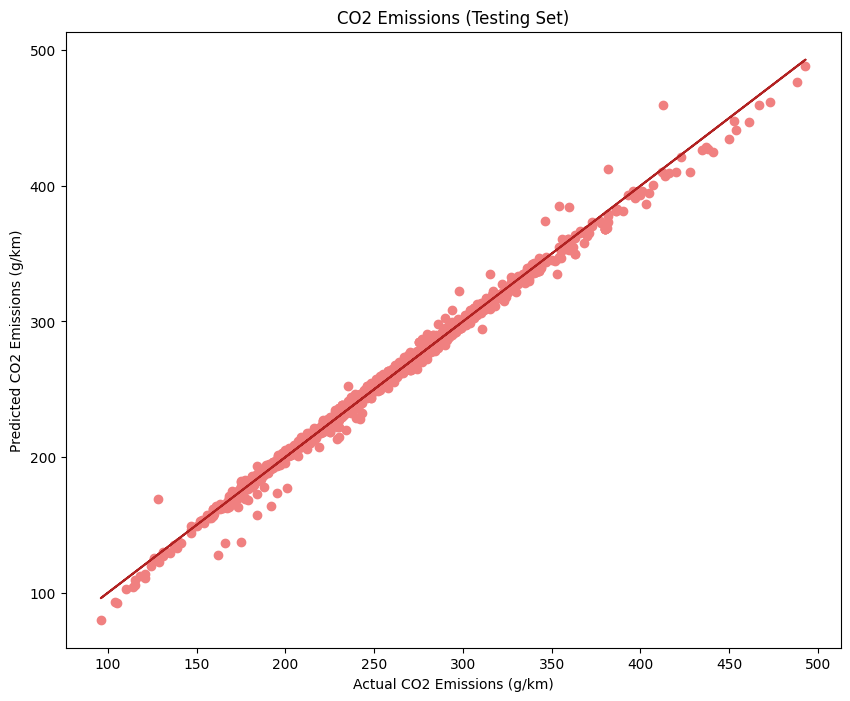

In [ ]:
# MULTIPLE REGRESSION


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

scaler =StandardScaler()

X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()

regressor.fit(X_train, y_train)
my_dict={}
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

r2 = r2_score(y_test, y_pred)

my_dict['ML']=r2
# Plotting of train set
plt.title("CO2 Emissions (Training Set)")
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.scatter(y_train, y_pred_train, color="lightcoral", label="Training Data")
plt.plot(y_train, y_train, color="firebrick", label="Perfect Prediction")
plt.show()

# Plotting of test set
plt.title("CO2 Emissions (Testing Set)")
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.scatter(y_test, y_pred, color="lightcoral", label="Testing Data")
plt.plot(y_test, y_test, color="firebrick", label="Perfect Prediction")
plt.show()


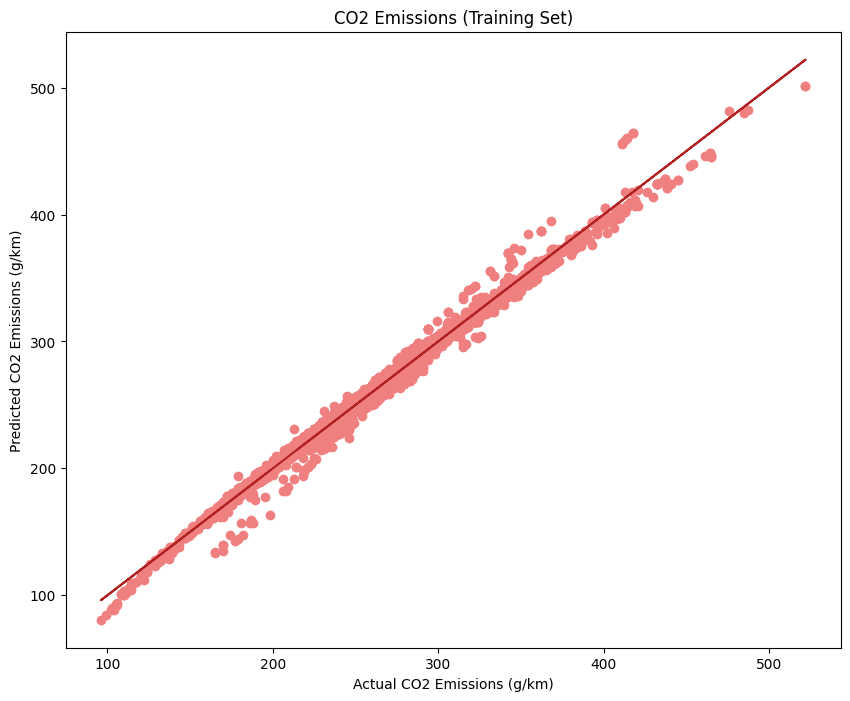

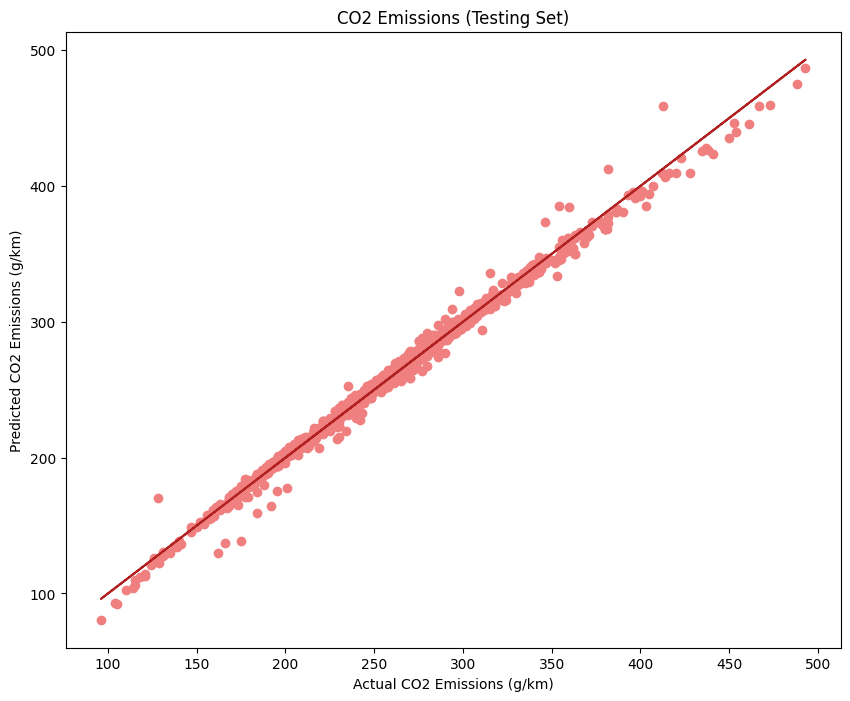

In [ ]:
# LASSO REGRESSION

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
y_pred_train = lasso.predict(X_train)

r2 = r2_score(y_test, y_pred)
my_dict['Lasso']=r2

# Plotting of train set
plt.title("CO2 Emissions (Training Set)")
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.scatter(y_train, y_pred_train, color="lightcoral", label="Training Data")
plt.plot(y_train, y_train, color="firebrick", label="Perfect Prediction")
plt.show()

# Plotting of test set
plt.title("CO2 Emissions (Testing Set)")
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.scatter(y_test, y_pred, color="lightcoral", label="Testing Data")
plt.plot(y_test, y_test, color="firebrick", label="Perfect Prediction")
plt.show()


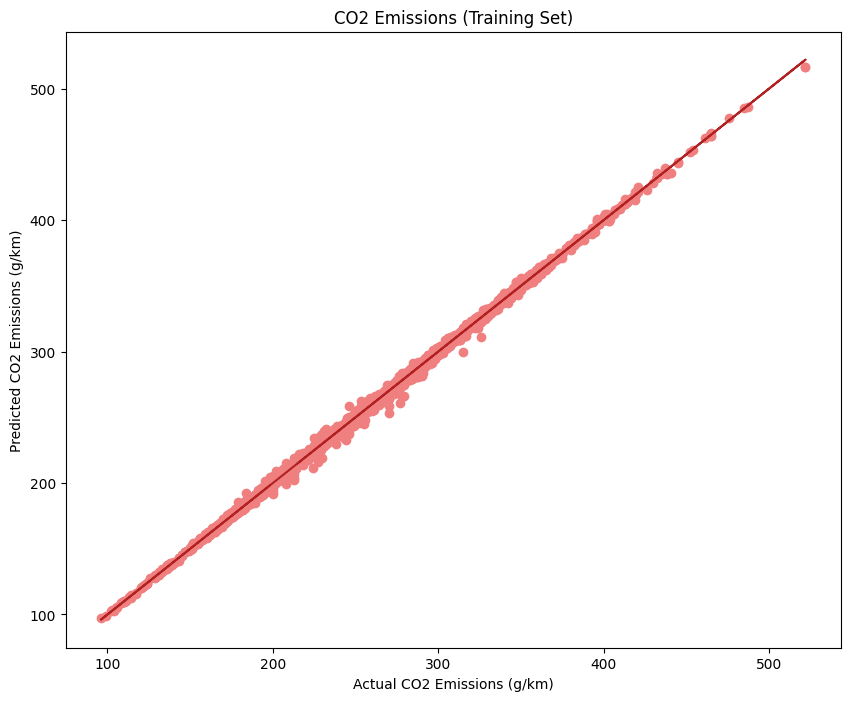

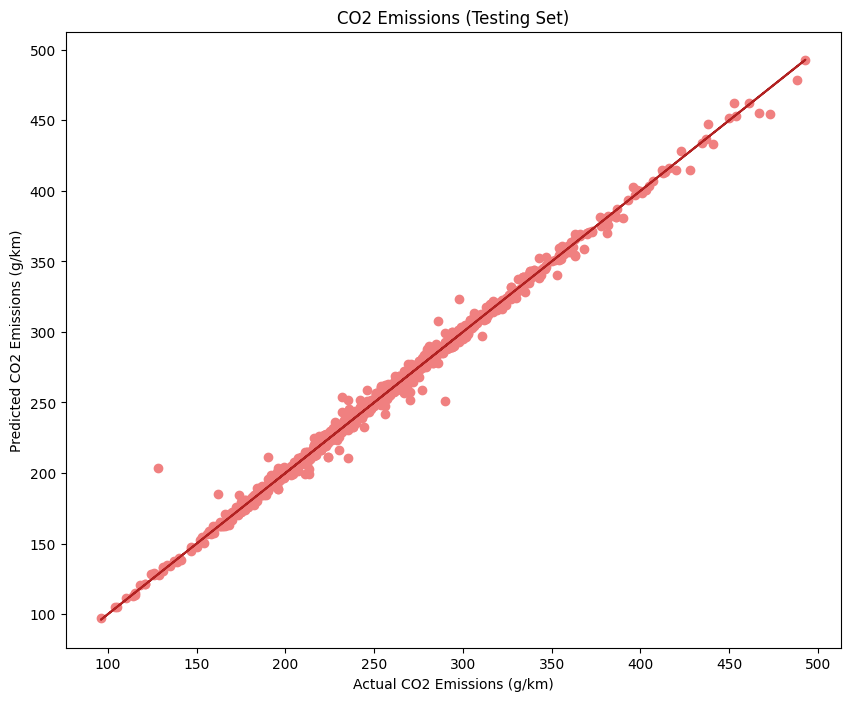

In [ ]:
# RANDOM FOREST

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X = data.drop('CO2 Emissions(g/km)', axis=1)
y = data['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
y_pred_train = rf_regressor.predict(X_train)

r2 = r2_score(y_test, y_pred)
my_dict['Random']=r2

# Plotting of train set
plt.title("CO2 Emissions (Training Set)")
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.scatter(y_train, y_pred_train, color="lightcoral", label="Training Data")
plt.plot(y_train, y_train, color="firebrick", label="Perfect Prediction")
plt.show()

# Plotting of test set
plt.title("CO2 Emissions (Testing Set)")
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.scatter(y_test, y_pred, color="lightcoral", label="Testing Data")
plt.plot(y_test, y_test, color="firebrick", label="Perfect Prediction")
plt.show()


In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)
dtr_pred = model.predict(X_test)
print(dtr_pred)
print(np.sqrt(mean_squared_error(y_test,dtr_pred )))
r2=r2_score(y_test, dtr_pred)
my_dict['DTR']=r2
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()


[322. 296. 294. ... 274. 184. 195.]
5.099043089773036


,0,1
0,322.0,298.0
1,296.0,296.0
2,294.0,300.0
3,274.5,275.0
4,269.0,267.0


In [ ]:
#Ridge regression

from sklearn.linear_model import Ridge
model=Ridge(alpha=0.3)
model.fit(X_train,y_train)
print('Coefficient:',model.intercept_)
print('Coeff',model.coef_)
y_ridge = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_ridge,y_test)))
r2=r2_score(y_test,y_ridge)
my_dict['Ridge']=r2
frames = [y_ridge, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
print(result_pred)
ridge_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
ridge_pred['pred_values'] = (ridge_pred['pred_values'].map(lambda x: round(x,2)))

ridge_pred['diff'] = abs(ridge_pred['real_values'] -ridge_pred['pred_values'])


print('mean diff: ', abs(ridge_pred['diff']).mean())
print(ridge_pred.head(10))

Coefficient: 90.73169100172171
Coeff [ 5.72149890e-04 -9.74827213e-03 -2.70718967e-04  4.79140665e-01
  9.87684214e-01  7.06628012e+00  6.13631223e+00  6.53993495e+00
 -9.69718952e-01 -1.36679542e+02 -3.06145026e+01 -2.96487333e+01
 -1.14465348e+01 -1.97516037e+00 -2.85758576e+00  2.78629777e-01
 -1.06999396e+00 -4.22377474e-01  1.47900932e-01  2.05223165e-01
 -1.13007353e+00 -1.81851621e+00  1.48381031e+00 -6.52073579e-01
 -4.68100255e+00 -3.63916998e+00 -1.92165938e+00 -2.25257138e+00
 -1.44253668e+00 -1.65900899e+00 -3.75931305e-01 -2.25671813e+00
 -3.35353023e+00 -2.08168737e+00 -2.89342433e+00 -1.90200489e+00
 -1.97136113e+00 -3.40325665e+00]
5.1350971703834425
               0      1
0     322.131486  298.0
1     291.937277  296.0
2     297.483479  300.0
3     274.466200  275.0
4     264.947342  267.0
...          ...    ...
1252  195.685046  197.0
1253  234.388204  236.0
1254  278.586320  279.0
1255  187.580809  187.0
1256  194.896544  194.0

[1257 rows x 2 columns]
mean diff:  

In [ ]:
#Printing all values
for key, value in {k: my_dict[k] for k in my_dict}.items():
    print(key, value)

ML 0.9927944562123441
Lasso 0.9925351801834393
Random 0.9949239069306537
DTR 0.9928963293826497
Ridge 0.9927955176121674
